### Step 1: Importing Libraries and Data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve

In [3]:
# Importing all datasets
lead_data = pd.read_csv(r"C:\Users\HP\Desktop\Pooja DA\datasets\Leads.csv")

### Step 2: Inspecting the Dataframe

In [4]:
# Let's see the head of our master dataset
lead_data.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [5]:
# Let's check the dimensions of the dataframe
lead_data.shape

(9240, 37)

In [6]:
# let's look at the statistical aspects of the dataframe
lead_data.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [7]:
# Let's see the type of each column
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Step 3: Data Cleaning

In [8]:
#Dropping unwanted columns
#Magazine is dropped as only value in column is No and it will not help
lead_data.drop(['Lead Number'], 1, inplace = True)

In [9]:
#Replacing 'Select' with NaN.

lead_data = lead_data.replace('Select', np.nan)

In [10]:
# Percentage of missing values in each column
((lead_data.isnull().sum()/len(lead_data))*100).sort_values(ascending=False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Score                      45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [11]:
#Removing columns with morethan 40% missing values
cols=lead_data.columns

for i in cols:
    if((100*(lead_data[i].isnull().sum()/len(lead_data.index))) >= 40):
        lead_data.drop(i, 1, inplace = True)

In [12]:
# Percentage of missing values in each column
((lead_data.isnull().sum()/len(lead_data))*100).sort_values(ascending=False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Receive More Updates About Our Courses            0.000000
Update me on Supply Chain Content                 0.000000
Prospect ID                                       0.000000
Digital Advertisement                             0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.000000
A free copy of Mastering The Interview            0.0000

#### Handling Missing Values

In [13]:
#Handling city columns

lead_data['City'].value_counts(dropna=False,normalize=True)

NaN                            0.397078
Mumbai                         0.348701
Thane & Outskirts              0.081385
Other Cities                   0.074242
Other Cities of Maharashtra    0.049459
Other Metro Cities             0.041126
Tier II Cities                 0.008009
Name: City, dtype: float64

In [14]:
# As the missing data is 39.7%. Adding this to any of the category will mislead the analysis.
#So i am adding it as "Missing_City" under City
lead_data.City.fillna('Missing_City',inplace=True)

In [15]:
lead_data['City'].value_counts(dropna=False,normalize=True)

Missing_City                   0.397078
Mumbai                         0.348701
Thane & Outskirts              0.081385
Other Cities                   0.074242
Other Cities of Maharashtra    0.049459
Other Metro Cities             0.041126
Tier II Cities                 0.008009
Name: City, dtype: float64

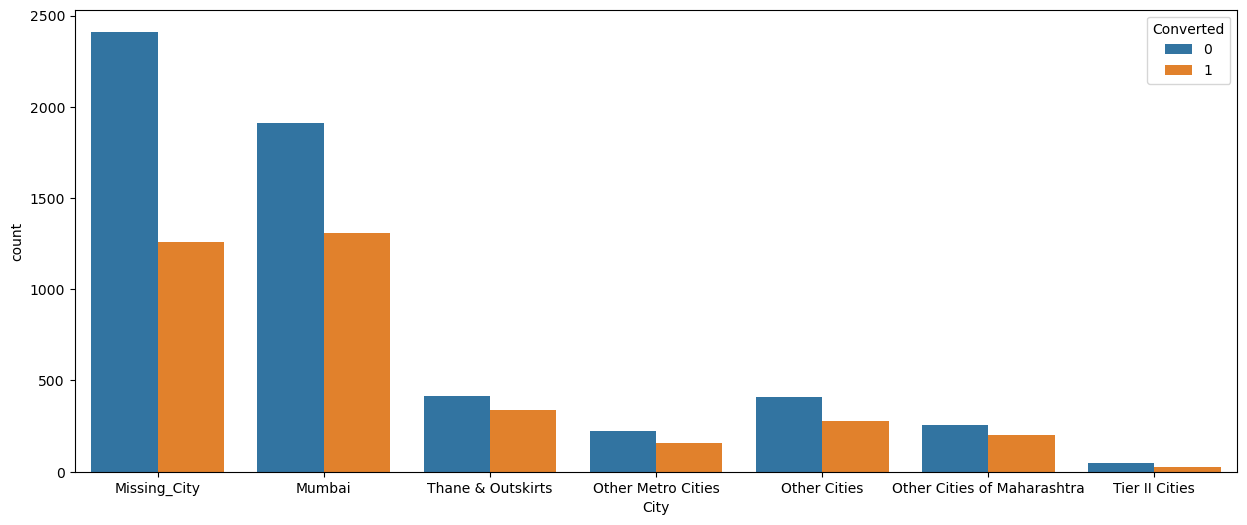

In [16]:
#plot city columns

plt.figure(figsize=(15,6))
s1=sns.countplot(lead_data.City, hue=lead_data.Converted)
plt.show()

In [17]:
#Handling Specialization column

lead_data['Specialization'].value_counts(dropna=False,normalize=True)

NaN                                  0.365801
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Travel and Tourism                   0.021970
Media and Advertising                0.021970
International Business               0.019264
Healthcare Management                0.017208
Hospitality Management               0.012338
E-COMMERCE                           0.012121
Retail Management                    0.010823
Rural and Agribusiness               0.007900
E-Business                           0.006169
Services Excellence                  0.004329
Name: Specialization, dtype: float64

In [18]:
#NAN will be replaced by 'Not specified' to handle the scenario where the Specialization is not yet decided. Adding this to any of the category will mislead the analysis
lead_data.Specialization.fillna('Spec_Not_Specified',inplace=True)

In [19]:
lead_data['Specialization'].value_counts(dropna=False,normalize=True)

Spec_Not_Specified                   0.365801
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Travel and Tourism                   0.021970
Media and Advertising                0.021970
International Business               0.019264
Healthcare Management                0.017208
Hospitality Management               0.012338
E-COMMERCE                           0.012121
Retail Management                    0.010823
Rural and Agribusiness               0.007900
E-Business                           0.006169
Services Excellence                  0.004329
Name: Specialization, dtype: float64

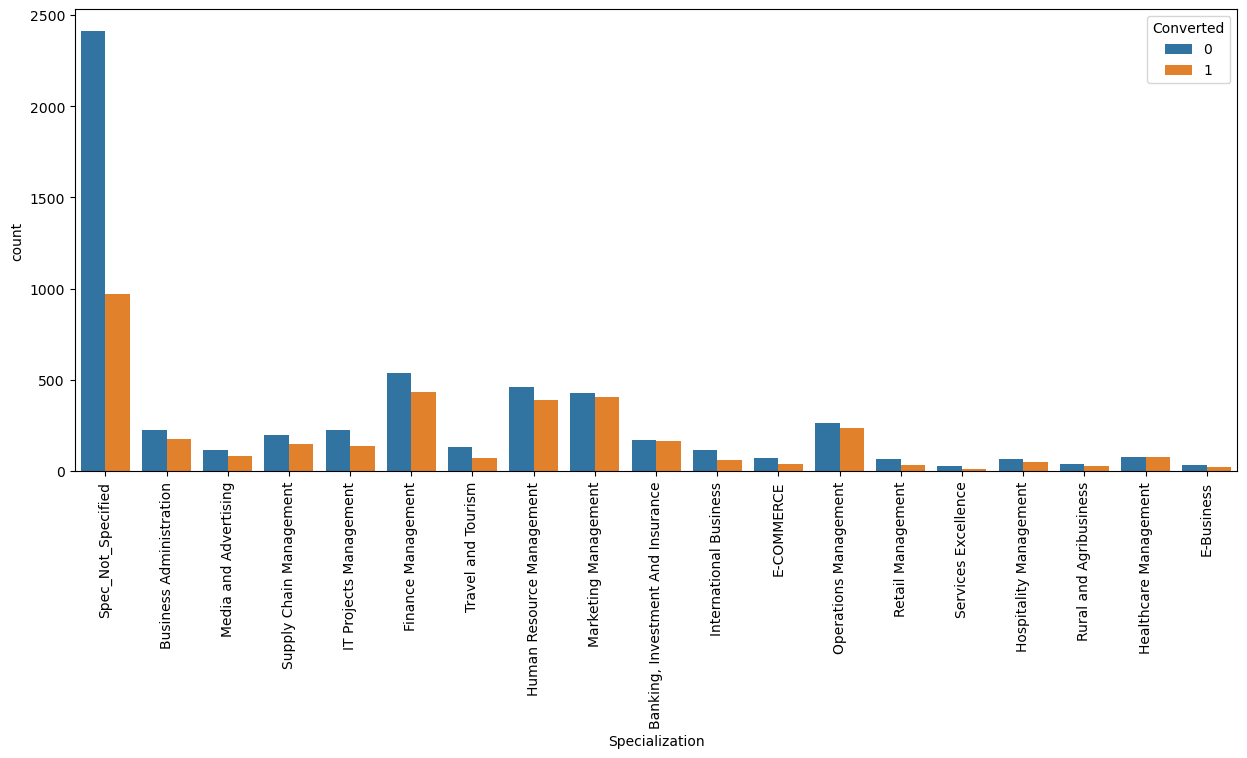

In [20]:
#plot city columns

plt.figure(figsize=(15,6))
s1=sns.countplot(lead_data.Specialization, hue=lead_data.Converted)
plt.xticks(rotation=90)
plt.show()

In [21]:
#Handling Tags column

lead_data['Tags'].value_counts(dropna=False,normalize=True)

NaN                                                  0.362879
Will revert after reading the email                  0.224242
Ringing                                              0.130195
Interested in other courses                          0.055519
Already a student                                    0.050325
Closed by Horizzon                                   0.038745
switched off                                         0.025974
Busy                                                 0.020130
Lost to EINS                                         0.018939
Not doing further education                          0.015693
Interested  in full time MBA                         0.012662
Graduation in progress                               0.012013
invalid number                                       0.008983
Diploma holder (Not Eligible)                        0.006818
wrong number given                                   0.005087
opp hangup                                           0.003571
number n

In [22]:
#NAN will be replaced by 'Not specified' to handle the scenario where the Tag is not specified. Adding this to any of the category will mislead the analysis
lead_data.Tags.fillna('Tags_Not_Specified',inplace=True)

In [23]:
lead_data['Tags'].value_counts(dropna=False,normalize=True)

Tags_Not_Specified                                   0.362879
Will revert after reading the email                  0.224242
Ringing                                              0.130195
Interested in other courses                          0.055519
Already a student                                    0.050325
Closed by Horizzon                                   0.038745
switched off                                         0.025974
Busy                                                 0.020130
Lost to EINS                                         0.018939
Not doing further education                          0.015693
Interested  in full time MBA                         0.012662
Graduation in progress                               0.012013
invalid number                                       0.008983
Diploma holder (Not Eligible)                        0.006818
wrong number given                                   0.005087
opp hangup                                           0.003571
number n

In [24]:
#<0.5% grouped as 'Other_Tags'
lead_data['Tags'] = lead_data['Tags'].replace(['opp hangup',
       'number not provided', 'in touch with EINS', 'Lost to Others',
       'Still Thinking', 'Want to take admission but has financial problems',
       'In confusion whether part time or DLP', 'Interested in Next batch',
       'Lateral student', 'Shall take in the next coming month',
       'University not recognized', 'Recognition issue (DEC approval)'], 'Other_Tags')

In [25]:
lead_data['Tags'].value_counts(dropna=False,normalize=True)

Tags_Not_Specified                     0.362879
Will revert after reading the email    0.224242
Ringing                                0.130195
Interested in other courses            0.055519
Already a student                      0.050325
Closed by Horizzon                     0.038745
switched off                           0.025974
Busy                                   0.020130
Lost to EINS                           0.018939
Not doing further education            0.015693
Interested  in full time MBA           0.012662
Graduation in progress                 0.012013
Other_Tags                             0.011797
invalid number                         0.008983
Diploma holder (Not Eligible)          0.006818
wrong number given                     0.005087
Name: Tags, dtype: float64

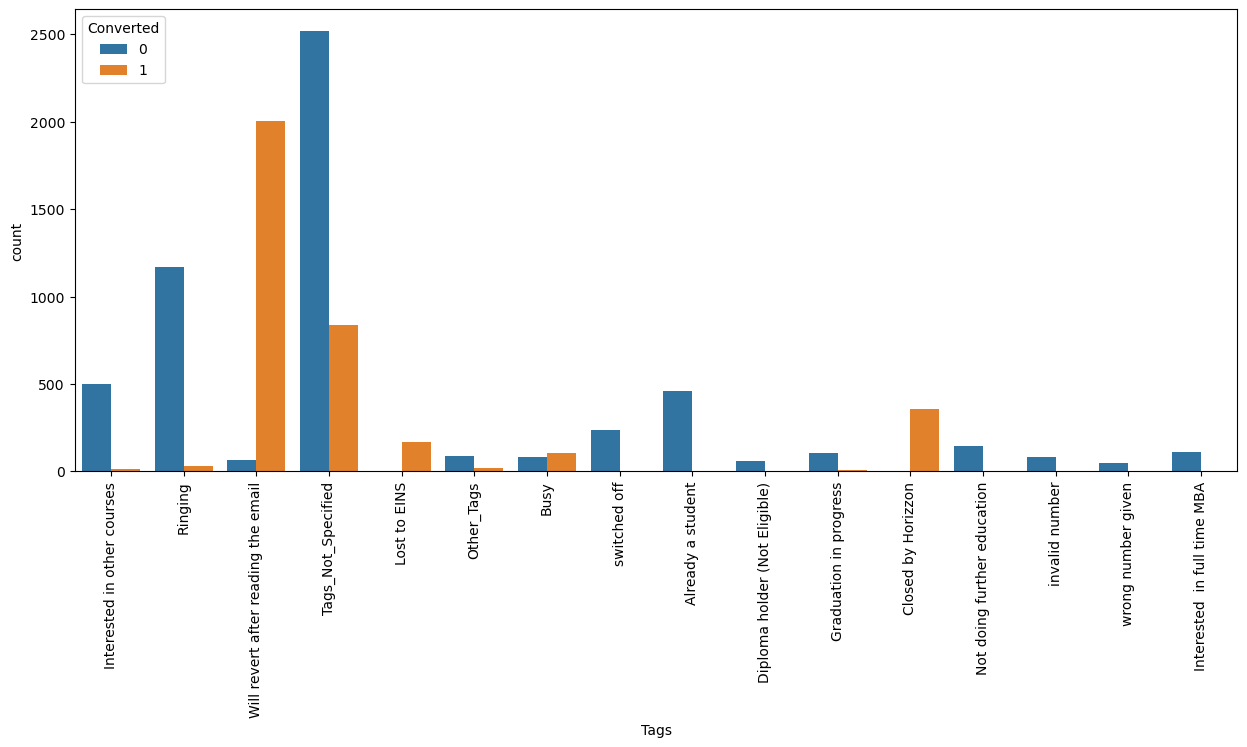

In [26]:
#plot Tags columns

plt.figure(figsize=(15,6))
s1=sns.countplot(lead_data.Tags, hue=lead_data.Converted)
plt.xticks(rotation=90)
plt.show()

In [27]:
#Handling 'What matters most to you in choosing a course' column

lead_data['What matters most to you in choosing a course'].value_counts(dropna=False,normalize=True)

Better Career Prospects      0.706494
NaN                          0.293182
Flexibility & Convenience    0.000216
Other                        0.000108
Name: What matters most to you in choosing a course, dtype: float64

In [28]:
#NAN will be replaced by 'Not specified' to handle the scenario where the 'What matters most to you in choosing a course' is not specified. Adding this to any of the category will mislead the analysis
lead_data['What matters most to you in choosing a course'].fillna('Crse_Not_Specified',inplace=True)

In [29]:
lead_data['What matters most to you in choosing a course'].value_counts(dropna=False,normalize=True)

Better Career Prospects      0.706494
Crse_Not_Specified           0.293182
Flexibility & Convenience    0.000216
Other                        0.000108
Name: What matters most to you in choosing a course, dtype: float64

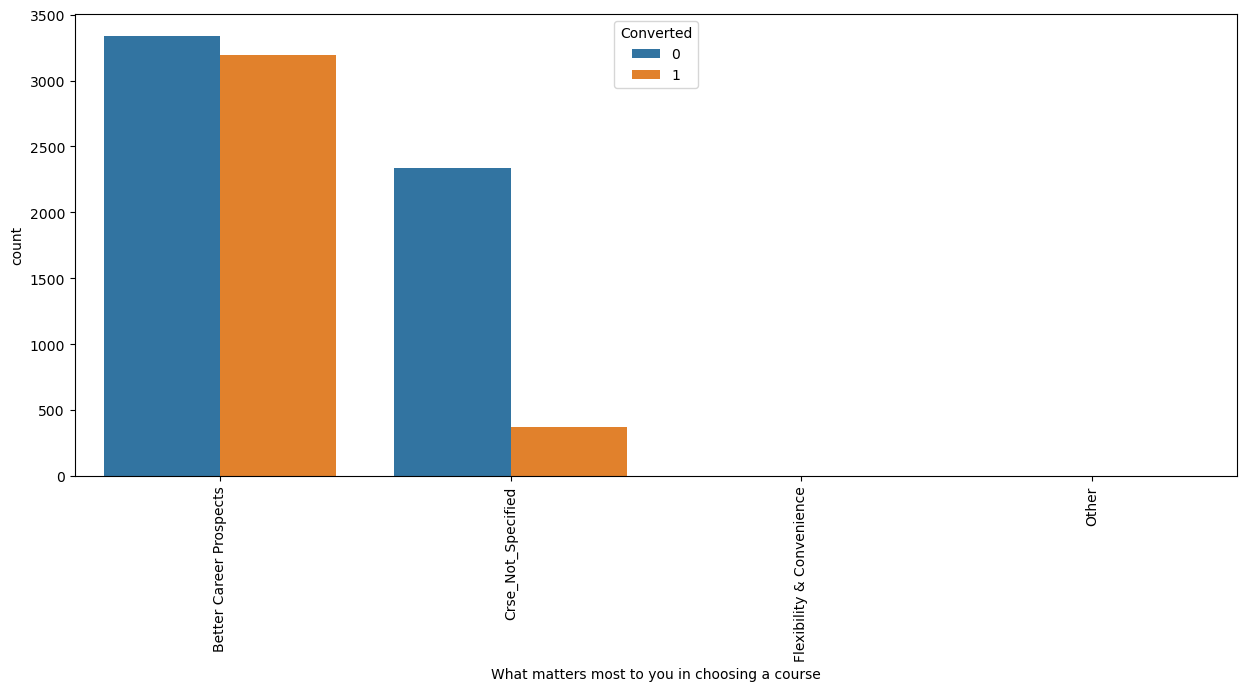

In [30]:
#plot What matters most to you in choosing a course column

plt.figure(figsize=(15,6))
s1=sns.countplot(lead_data['What matters most to you in choosing a course'], hue=lead_data.Converted)
plt.xticks(rotation=90)
plt.show()

In [31]:
#Handling What is your current occupation column

lead_data['What is your current occupation'].value_counts(dropna=False,normalize=True)

Unemployed              0.606061
NaN                     0.291126
Working Professional    0.076407
Student                 0.022727
Other                   0.001732
Housewife               0.001082
Businessman             0.000866
Name: What is your current occupation, dtype: float64

In [32]:
#NAN will be replaced by 'Not specified' to handle the scenario where the 'What is your current occupation' is not specified. Adding this to any of the category will mislead the analysis
lead_data['What is your current occupation'].fillna('Occ_Not_Specified',inplace=True)

In [33]:
lead_data['What is your current occupation'].value_counts(dropna=False,normalize=True)

Unemployed              0.606061
Occ_Not_Specified       0.291126
Working Professional    0.076407
Student                 0.022727
Other                   0.001732
Housewife               0.001082
Businessman             0.000866
Name: What is your current occupation, dtype: float64

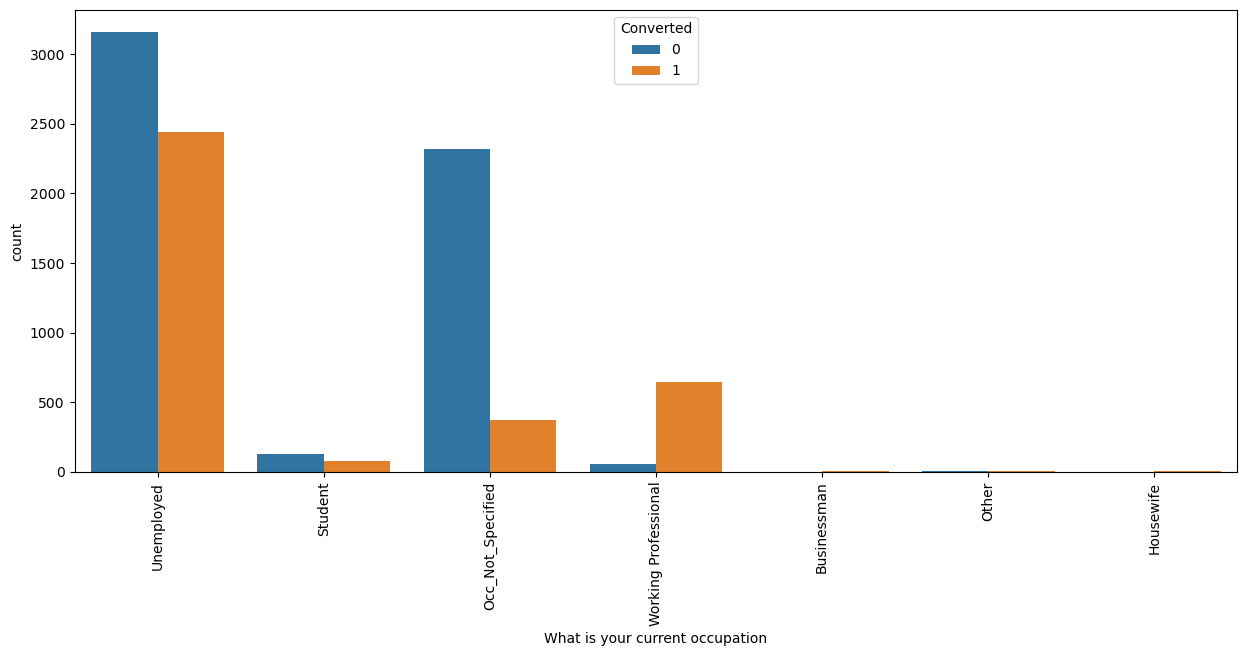

In [34]:
#plot What is your current occupation column

plt.figure(figsize=(15,6))
s1=sns.countplot(lead_data['What is your current occupation'], hue=lead_data.Converted)
plt.xticks(rotation=90)
plt.show()

In [35]:
#Handling Country column

lead_data.Country.value_counts(dropna=False,normalize=True)

India                   0.702597
NaN                     0.266342
United States           0.007468
United Arab Emirates    0.005736
Singapore               0.002597
Saudi Arabia            0.002273
United Kingdom          0.001623
Australia               0.001407
Qatar                   0.001082
Bahrain                 0.000758
Hong Kong               0.000758
Oman                    0.000649
France                  0.000649
unknown                 0.000541
Kuwait                  0.000433
South Africa            0.000433
Canada                  0.000433
Nigeria                 0.000433
Germany                 0.000433
Sweden                  0.000325
Philippines             0.000216
Uganda                  0.000216
Italy                   0.000216
Bangladesh              0.000216
Netherlands             0.000216
Asia/Pacific Region     0.000216
China                   0.000216
Belgium                 0.000216
Ghana                   0.000216
Kenya                   0.000108
Sri Lanka 

In [36]:
#NAN will be replaced by 'Missing Country' to handle the scenario where the 'Country' is not specified. Adding this to any of the category will mislead the analysis
lead_data.Country.fillna('Missing_Country',inplace=True)

In [37]:
#<0.5% grouped as 'Other_Countries'
lead_data['Country'] = lead_data['Country'].replace(['Singapore', 'Saudi Arabia', 'United Kingdom',
       'Australia', 'Qatar','Bahrain', 'Hong Kong', 'Oman', 'France', 'unknown', 'Kuwait',
       'South Africa', 'Canada', 'Nigeria', 'Germany', 'Sweden', 'Philippines',
       'Uganda', 'Italy', 'Bangladesh', 'Netherlands', 'Asia/Pacific Region',
       'China', 'Belgium', 'Ghana', 'Kenya', 'Sri Lanka', 'Tanzania',
       'Malaysia', 'Liberia', 'Switzerland', 'Denmark', 'Russia', 'Vietnam',
       'Indonesia'], 'Other_Countries')

In [38]:
lead_data.Country.value_counts(dropna=False,normalize=True)

India                   0.702597
Missing_Country         0.266342
Other_Countries         0.017857
United States           0.007468
United Arab Emirates    0.005736
Name: Country, dtype: float64

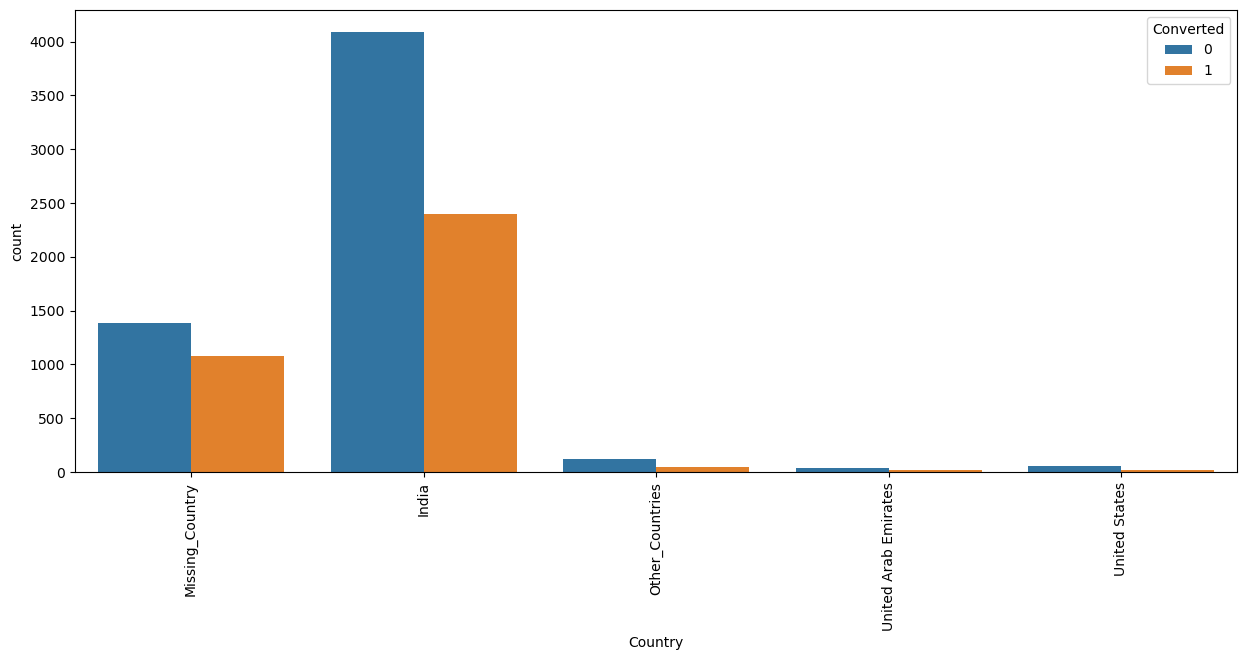

In [39]:
#plot Country column

plt.figure(figsize=(15,6))
s1=sns.countplot(lead_data['Country'], hue=lead_data.Converted)
plt.xticks(rotation=90)
plt.show()

In [40]:
#Handling Last Activity column

lead_data['Last Activity'].value_counts(dropna=False,normalize=True)

Email Opened                    0.371970
SMS Sent                        0.297078
Olark Chat Conversation         0.105303
Page Visited on Website         0.069264
Converted to Lead               0.046320
Email Bounced                   0.035281
Email Link Clicked              0.028896
Form Submitted on Website       0.012554
NaN                             0.011147
Unreachable                     0.010065
Unsubscribed                    0.006602
Had a Phone Conversation        0.003247
Approached upfront              0.000974
View in browser link Clicked    0.000649
Email Received                  0.000216
Email Marked Spam               0.000216
Visited Booth in Tradeshow      0.000108
Resubscribed to emails          0.000108
Name: Last Activity, dtype: float64

In [41]:
#Used mode to impute the Last Activity. Used most frequent used value.
lead_data['Last Activity'].fillna(lead_data['Last Activity'].mode()[0],inplace=True)

In [42]:
#<0.5% grouped as 'LA_Others'
lead_data['Last Activity'] = lead_data['Last Activity'].replace(['Had a Phone Conversation', 'Approached upfront',
       'View in browser link Clicked', 'Email Received', 'Email Marked Spam',
       'Visited Booth in Tradeshow', 'Resubscribed to emails'], 'LA_Others')

In [43]:
lead_data['Last Activity'].value_counts(dropna=False,normalize=True)

Email Opened                 0.383117
SMS Sent                     0.297078
Olark Chat Conversation      0.105303
Page Visited on Website      0.069264
Converted to Lead            0.046320
Email Bounced                0.035281
Email Link Clicked           0.028896
Form Submitted on Website    0.012554
Unreachable                  0.010065
Unsubscribed                 0.006602
LA_Others                    0.005519
Name: Last Activity, dtype: float64

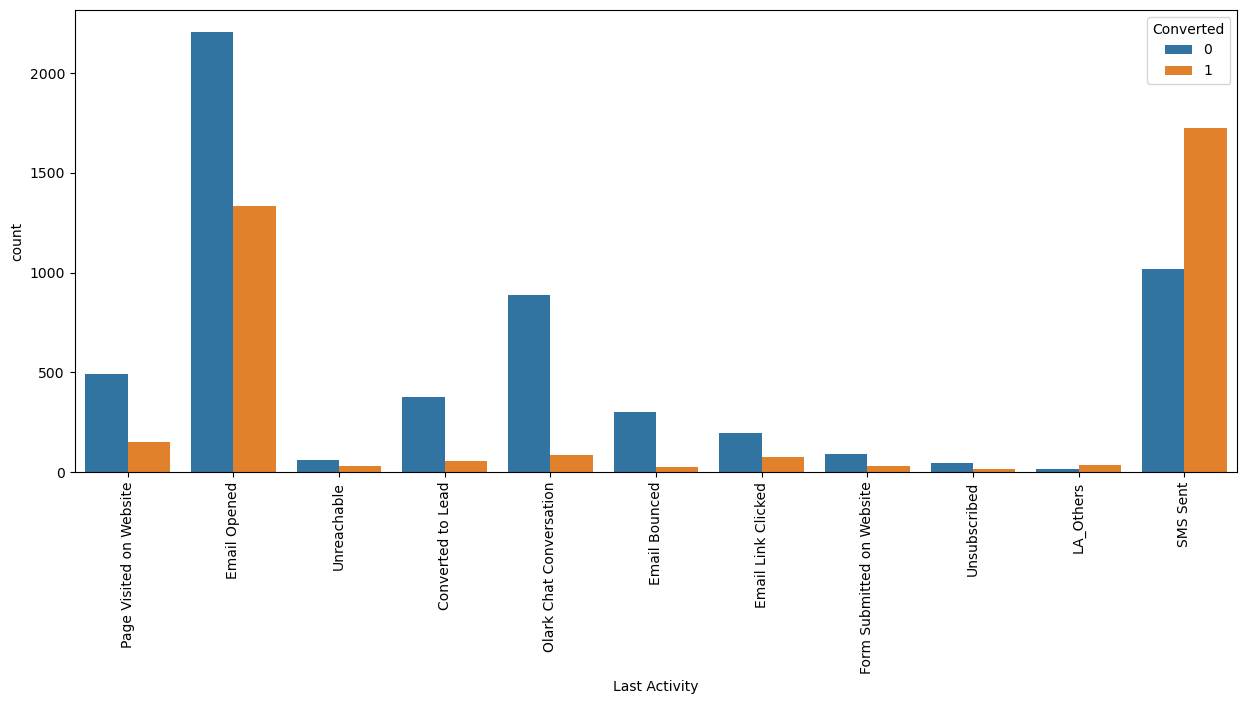

In [44]:
#plot Last Activity column

plt.figure(figsize=(15,6))
s1=sns.countplot(lead_data['Last Activity'], hue=lead_data.Converted)
plt.xticks(rotation=90)
plt.show()

In [45]:
#Handling Lead Source column

lead_data['Lead Source'].value_counts(dropna=False,normalize=True)

Google               0.310390
Direct Traffic       0.275216
Olark Chat           0.189935
Organic Search       0.124892
Reference            0.057792
Welingak Website     0.015368
Referral Sites       0.013528
Facebook             0.005952
NaN                  0.003896
bing                 0.000649
google               0.000541
Click2call           0.000433
Press_Release        0.000216
Social Media         0.000216
Live Chat            0.000216
youtubechannel       0.000108
testone              0.000108
Pay per Click Ads    0.000108
welearnblog_Home     0.000108
WeLearn              0.000108
blog                 0.000108
NC_EDM               0.000108
Name: Lead Source, dtype: float64

In [46]:
#Used mode to impute the Lead Source. Used most frequent used value.
lead_data['Lead Source'].fillna(lead_data['Lead Source'].mode()[0],inplace=True)

In [47]:
#<0.5% grouped as 'LS_Others'
lead_data['Lead Source'] = lead_data['Lead Source'].replace(['bing', 'google',
       'Click2call', 'Press_Release', 'Social Media', 'Live Chat',
       'youtubechannel', 'testone', 'Pay per Click Ads', 'welearnblog_Home',
       'WeLearn', 'blog', 'NC_EDM'], 'LS_Others')

In [48]:
lead_data['Lead Source'].value_counts(dropna=False,normalize=True)

Google              0.314286
Direct Traffic      0.275216
Olark Chat          0.189935
Organic Search      0.124892
Reference           0.057792
Welingak Website    0.015368
Referral Sites      0.013528
Facebook            0.005952
LS_Others           0.003030
Name: Lead Source, dtype: float64

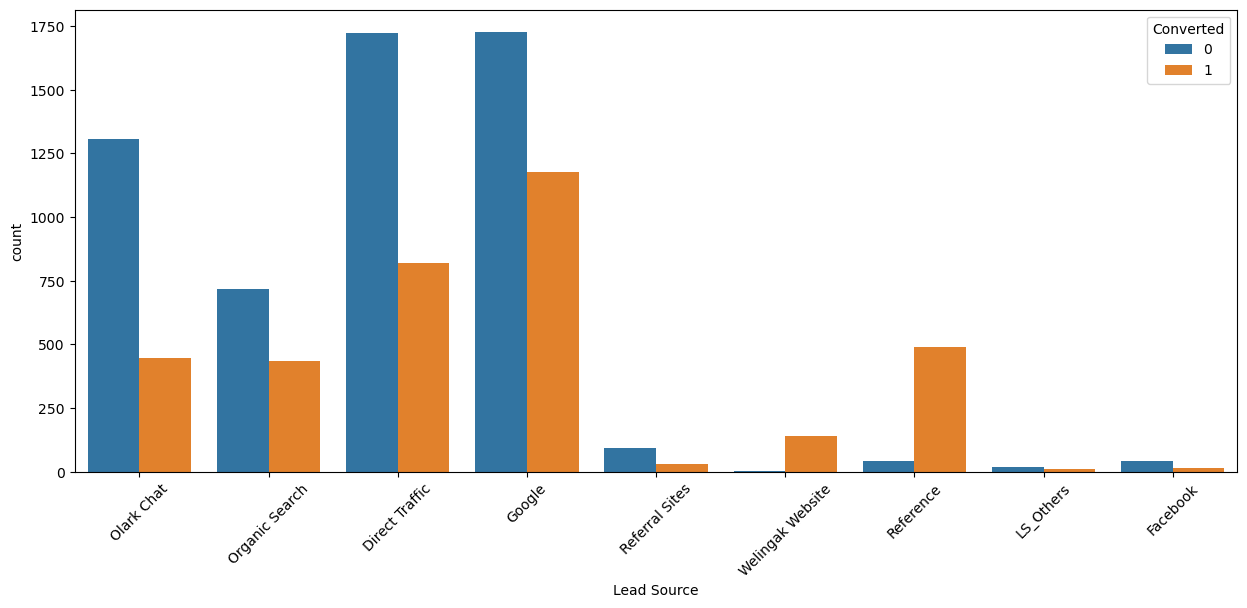

In [49]:
#plot Lead Source column

plt.figure(figsize=(15,6))
s1=sns.countplot(lead_data['Lead Source'], hue=lead_data.Converted)
plt.xticks(rotation=45)
plt.show()

In [50]:
lead_data.describe()

Converted  TotalVisits  Total Time Spent on Website  \
count  9240.000000  9103.000000                  9240.000000   
mean      0.385390     3.445238                   487.698268   
std       0.486714     4.854853                   548.021466   
min       0.000000     0.000000                     0.000000   
25%       0.000000     1.000000                    12.000000   
50%       0.000000     3.000000                   248.000000   
75%       1.000000     5.000000                   936.000000   
max       1.000000   251.000000                  2272.000000   

       Page Views Per Visit  
count           9103.000000  
mean               2.362820  
std                2.161418  
min                0.000000  
25%                1.000000  
50%                2.000000  
75%                3.000000  
max               55.000000

### Outlier Handling

In [51]:

lead_data['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [52]:
lead_data['TotalVisits'].value_counts(dropna=False)

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
NaN       137
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

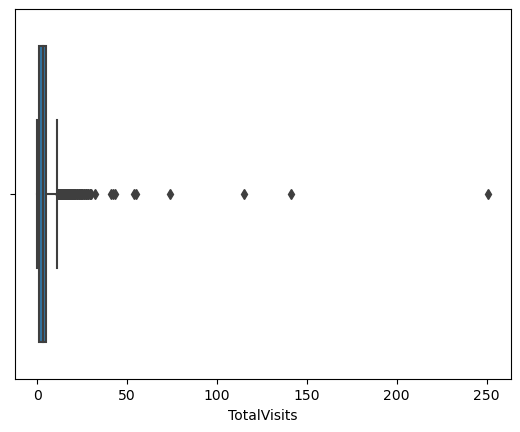

In [53]:
sns.boxplot(data=lead_data,x='TotalVisits')
plt.show()

In [54]:
lead_data['TotalVisits'].quantile([0,0.25,0.5,0.75,0.85,0.9,0.95,0.99,1])

0.00      0.0
0.25      1.0
0.50      3.0
0.75      5.0
0.85      6.0
0.90      7.0
0.95     10.0
0.99     17.0
1.00    251.0
Name: TotalVisits, dtype: float64

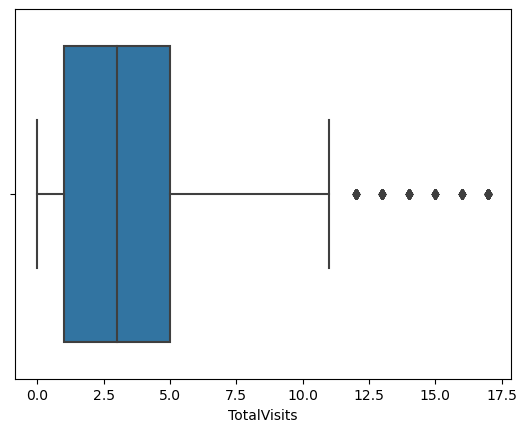

In [55]:
#Capping to 99th percentile
lead_data['TotalVisits']=np.where(lead_data['TotalVisits'] > lead_data['TotalVisits'].quantile(0.99),lead_data['TotalVisits'].quantile(0.99),lead_data['TotalVisits'])
sns.boxplot(data=lead_data,x='TotalVisits')
plt.show()

In [56]:
lead_data['TotalVisits'].describe()

count    9103.000000
mean        3.332747
std         3.252420
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        17.000000
Name: TotalVisits, dtype: float64

In [57]:
#outliers in TotalVisits so using median to impute
TotalVisits_Median=lead_data['TotalVisits'].median()
lead_data['TotalVisits'].fillna(TotalVisits_Median,inplace=True)

In [58]:
lead_data['TotalVisits'].describe()

count    9240.000000
mean        3.327814
std         3.228466
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        17.000000
Name: TotalVisits, dtype: float64

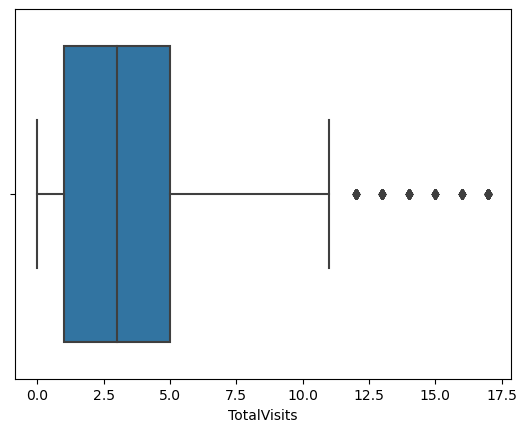

In [59]:
sns.boxplot(data=lead_data,x='TotalVisits')
plt.show()

In [60]:
lead_data['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [61]:
lead_data['Page Views Per Visit'].value_counts(dropna=False)

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
2.56       1
6.33       1
1.64       1
8.21       1
2.08       1
Name: Page Views Per Visit, Length: 115, dtype: int64

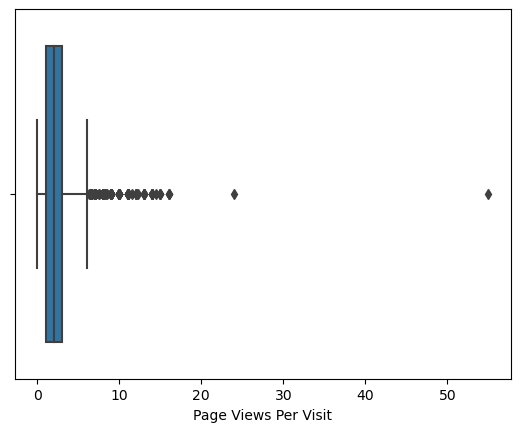

In [62]:
sns.boxplot(data=lead_data,x='Page Views Per Visit')
plt.show()

In [63]:
lead_data['Page Views Per Visit'].quantile([0,0.25,0.5,0.75,0.85,0.9,0.95,0.99,1])

0.00     0.0
0.25     1.0
0.50     2.0
0.75     3.0
0.85     4.0
0.90     5.0
0.95     6.0
0.99     9.0
1.00    55.0
Name: Page Views Per Visit, dtype: float64

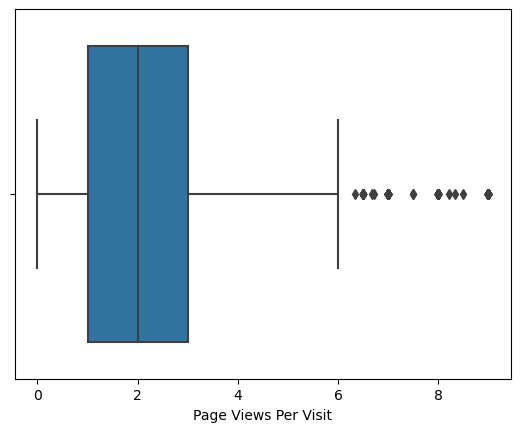

In [64]:
#Capping to 99th percentile
lead_data['Page Views Per Visit']=np.where(lead_data['Page Views Per Visit'] > lead_data['Page Views Per Visit'].quantile(0.99),lead_data['Page Views Per Visit'].quantile(0.99),lead_data['Page Views Per Visit'])
sns.boxplot(data=lead_data,x='Page Views Per Visit')
plt.show()

In [65]:
lead_data['Page Views Per Visit'].describe()

count    9103.000000
mean        2.334002
std         1.985712
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         9.000000
Name: Page Views Per Visit, dtype: float64

In [66]:
#there aare outliers in TotalVisits so using median to impute
PVPV_Median=lead_data['Page Views Per Visit'].median()
lead_data['Page Views Per Visit'].fillna(PVPV_Median,inplace=True)

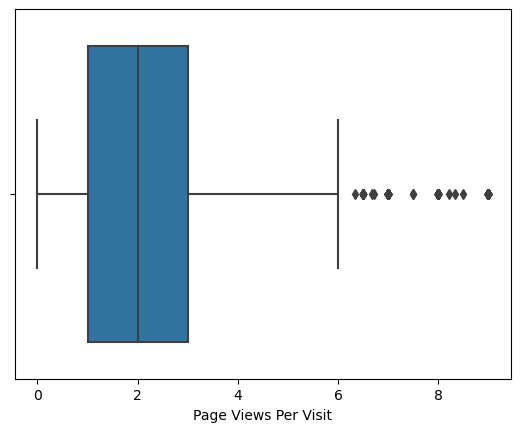

In [67]:
sns.boxplot(data=lead_data,x='Page Views Per Visit')
plt.show()

In [68]:
lead_data['Page Views Per Visit'].describe()

count    9240.000000
mean        2.329050
std         1.971347
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         9.000000
Name: Page Views Per Visit, dtype: float64

In [69]:
lead_data['Total Time Spent on Website'].describe()

count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
25%        12.000000
50%       248.000000
75%       936.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

In [70]:
lead_data['Total Time Spent on Website'].value_counts(dropna=False)

0       2193
60        19
74        18
75        18
127       18
        ... 
1701       1
1952       1
1229       1
1743       1
927        1
Name: Total Time Spent on Website, Length: 1731, dtype: int64

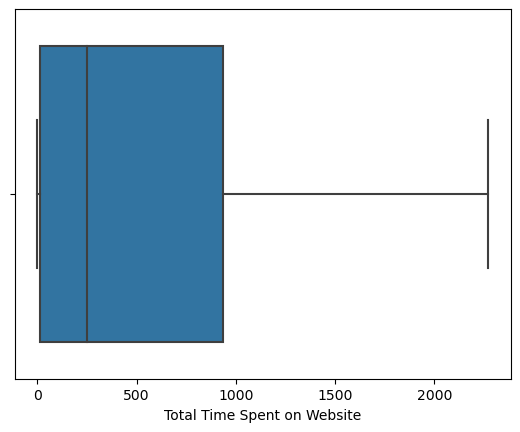

In [71]:
sns.boxplot(data=lead_data,x='Total Time Spent on Website')
plt.show()

In [72]:
lead_data['Last Notable Activity'].value_counts(dropna=False,normalize=True)

Modified                        0.368723
Email Opened                    0.305952
SMS Sent                        0.235065
Page Visited on Website         0.034416
Olark Chat Conversation         0.019805
Email Link Clicked              0.018723
Email Bounced                   0.006494
Unsubscribed                    0.005087
Unreachable                     0.003463
Had a Phone Conversation        0.001515
Email Marked Spam               0.000216
Approached upfront              0.000108
Resubscribed to emails          0.000108
View in browser link Clicked    0.000108
Form Submitted on Website       0.000108
Email Received                  0.000108
Name: Last Notable Activity, dtype: float64

In [73]:
#<0.5% grouped as 'LNA_Others'
lead_data['Last Notable Activity'] = lead_data['Last Notable Activity'].replace(['Unreachable', 'Had a Phone Conversation',
       'Email Marked Spam', 'Approached upfront', 'Resubscribed to emails',
       'View in browser link Clicked', 'Form Submitted on Website',
       'Email Received'], 'LNA_Others')

In [74]:
lead_data['Last Notable Activity'].value_counts(dropna=False,normalize=True)

Modified                   0.368723
Email Opened               0.305952
SMS Sent                   0.235065
Page Visited on Website    0.034416
Olark Chat Conversation    0.019805
Email Link Clicked         0.018723
Email Bounced              0.006494
LNA_Others                 0.005736
Unsubscribed               0.005087
Name: Last Notable Activity, dtype: float64

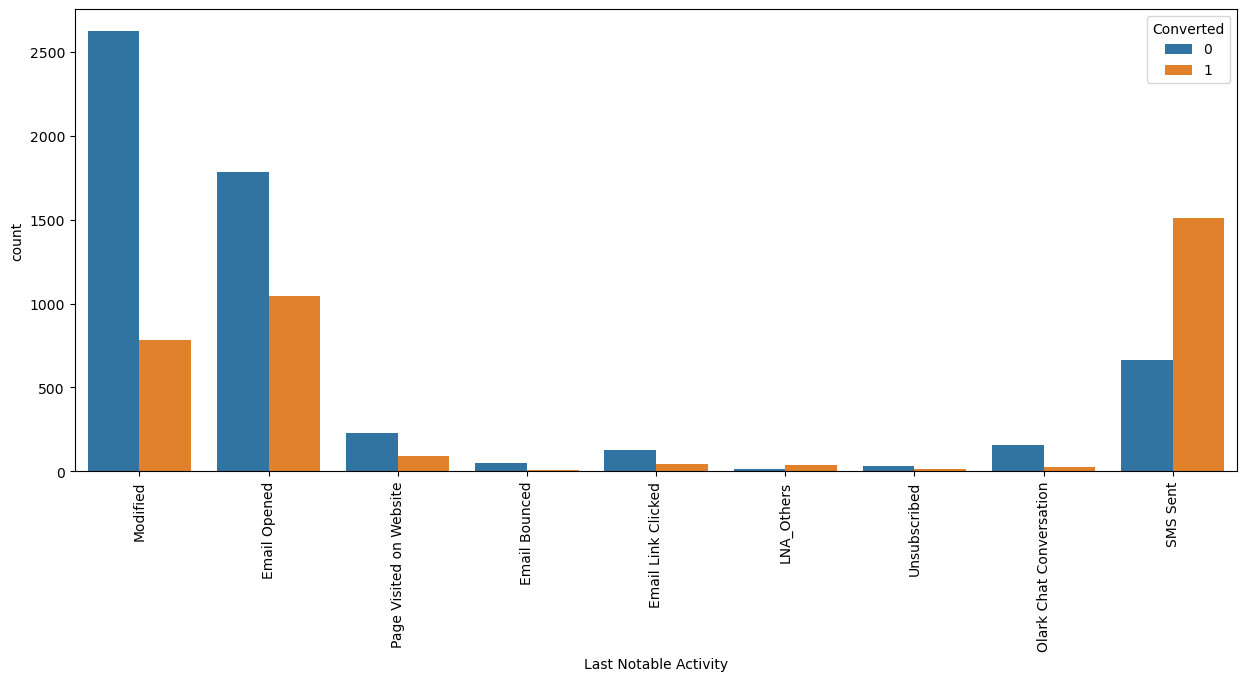

In [75]:
#plot Lead Source column

plt.figure(figsize=(15,6))
s1=sns.countplot(lead_data['Last Notable Activity'], hue=lead_data.Converted)
plt.xticks(rotation=90)
plt.show()

    # Deleting below columns
    # Magazine - no leads from it so delete the column
    # 'Receive More Updates About Our Courses' - No leads has selected this option so it will not added value to analysis
    # 'Update me on Supply Chain Content' - No leads has selected this option so it will not added value to analysis
    # 'Get updates on DM Content' - No leads has selected this option so it will not added value to analysis
    # 'I agree to pay the amount through cheque' - No leads has selected this option so it will not added value to analysis
    
    

In [76]:
lead_data.drop(['Magazine', 'Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'], 1, inplace = True)

### Step 4: Data Preparation

In [77]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9240 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9240 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9240 non-null   float64
 9   Last Activity                                  9240 

In [78]:
lead_data['Last Notable Activity'].value_counts(dropna=False)

Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Email Bounced                60
LNA_Others                   53
Unsubscribed                 47
Name: Last Notable Activity, dtype: int64

#### Converting some binary variables (Yes/No) to 0/1

In [79]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call', 'X Education Forums','Search', 'Newspaper Article', 'Newspaper','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
lead_data[varlist] = lead_data[varlist].apply(binary_map)

In [80]:
lead_data.describe()

Do Not Email  Do Not Call    Converted  TotalVisits  \
count   9240.000000  9240.000000  9240.000000  9240.000000   
mean       0.079437     0.000216     0.385390     3.327814   
std        0.270435     0.014711     0.486714     3.228466   
min        0.000000     0.000000     0.000000     0.000000   
25%        0.000000     0.000000     0.000000     1.000000   
50%        0.000000     0.000000     0.000000     3.000000   
75%        0.000000     0.000000     1.000000     5.000000   
max        1.000000     1.000000     1.000000    17.000000   

       Total Time Spent on Website  Page Views Per Visit       Search  \
count                  9240.000000           9240.000000  9240.000000   
mean                    487.698268              2.329050     0.001515   
std                     548.021466              1.971347     0.038898   
min                       0.000000              0.000000     0.000000   
25%                      12.000000              1.000000     0.000000   
50%                     248.000000              2.000000     0.000000   
75%                     936.000000              3.000000     0.000000   
max                    2272.000000              9.000000     1.000000   

       Newspaper Article  X Education Forums    Newspaper  \
count        9240.000000         9240.000000  9240.000000   
mean            0.000216            0.000108     0.000108   
std             0.014711            0.010403     0.010403   
min             0.000000            0.000000     0.000000   
25%             0.000000            0.000000     0.000000   
50%             0.000000            0.000000     0.000000   
75%             0.000000            0.000000     0.000000   
max             1.000000            1.000000     1.000000   

       Digital Advertisement  Through Recommendations  \
count            9240.000000              9240.000000   
mean                0.000433                 0.000758   
std                 0.020803                 0.027515   
min                 0.000000                 0.000000   
25%                 0.000000                 0.000000   
50%                 0.000000                 0.000000   
75%                 0.000000                 0.000000   
max                 1.000000                 1.000000   

       A free copy of Mastering The Interview  
count                             9240.000000  
mean                                 0.312554  
std                                  0.463559  
min                                  0.000000  
25%                                  0.000000  
50%                                  0.000000  
75%                                  1.000000  
max                                  1.000000

#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [81]:
# Creating a dummy variable for the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(lead_data[['Lead Origin', 'Lead Source', 'Last Activity', 'Country','Specialization','What is your current occupation','What matters most to you in choosing a course','Tags','City','Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
lead_data = pd.concat([lead_data, dummy1], axis=1)

In [82]:
lead_data.head()

Prospect ID              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852  Landing Page Submission   

      Lead Source  Do Not Email  Do Not Call  Converted  TotalVisits  \
0      Olark Chat             0            0          0          0.0   
1  Organic Search             0            0          0          5.0   
2  Direct Traffic             0            0          1          2.0   
3  Direct Traffic             0            0          0          1.0   
4          Google             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

   ... City_Thane & Outskirts City_Tier II Cities  \
0  ...                      0                   0   
1  ...                      0                   0   
2  ...                      0                   0   
3  ...                      0                   0   
4  ...                      0                   0   

  Last Notable Activity_Email Link Clicked Last Notable Activity_Email Opened  \
0                                        0                                  0   
1                                        0                                  1   
2                                        0                                  1   
3                                        0                                  0   
4                                        0                                  0   

   Last Notable Activity_LNA_Others  Last Notable Activity_Modified  \
0                                 0                               1   
1                                 0                               0   
2                                 0                               0   
3                                 0                               1   
4                                 0                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unsubscribed  
0                               0                                   0  
1                               0                                   0  
2                               0                                   0  
3                               0                                   0  
4                               0                                   0  

[5 rows x 106 columns]

In [83]:
#Dropping columns for which dummies are created
lead_data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Country','Specialization','What is your current occupation','What matters most to you in choosing a course','Tags','City','Last Notable Activity'], 1, inplace = True)

In [84]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 96 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Prospect ID                                                              9240 non-null   object 
 1   Do Not Email                                                             9240 non-null   int64  
 2   Do Not Call                                                              9240 non-null   int64  
 3   Converted                                                                9240 non-null   int64  
 4   TotalVisits                                                              9240 non-null   float64
 5   Total Time Spent on Website                                              9240 non-null   int64  
 6   Page Views Per Visit                                                    

### Step 5: Test-Train Split

In [85]:
# Putting feature variable to X
X = lead_data.drop(['Converted','Prospect ID'], axis=1)

X.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
0             0            0          0.0                            0   
1             0            0          5.0                          674   
2             0            0          2.0                         1532   
3             0            0          1.0                          305   
4             0            0          2.0                         1428   

   Page Views Per Visit  Search  Newspaper Article  X Education Forums  \
0                   0.0       0                  0                   0   
1                   2.5       0                  0                   0   
2                   2.0       0                  0                   0   
3                   1.0       0                  0                   0   
4                   1.0       0                  0                   0   

   Newspaper  Digital Advertisement  ...  City_Thane & Outskirts  \
0          0                      0  ...                       0   
1          0                      0  ...                       0   
2          0                      0  ...                       0   
3          0                      0  ...                       0   
4          0                      0  ...                       0   

   City_Tier II Cities  Last Notable Activity_Email Link Clicked  \
0                    0                                         0   
1                    0                                         0   
2                    0                                         0   
3                    0                                         0   
4                    0                                         0   

   Last Notable Activity_Email Opened  Last Notable Activity_LNA_Others  \
0                                   0                                 0   
1                                   1                                 0   
2                                   1                                 0   
3                                   0                                 0   
4                                   0                                 0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unsubscribed  
0                               0                                   0  
1                               0                                   0  
2                               0                                   0  
3                               0                                   0  
4                               0                                   0  

[5 rows x 94 columns]

In [86]:
# Putting response variable to y
y = lead_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [87]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [88]:
X_train.describe()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
count   6468.000000  6468.000000  6468.000000                  6468.000000   
mean       0.078386     0.000309     3.331014                   483.875850   
std        0.268799     0.017583     3.257666                   546.565663   
min        0.000000     0.000000     0.000000                     0.000000   
25%        0.000000     0.000000     1.000000                    12.000000   
50%        0.000000     0.000000     3.000000                   246.000000   
75%        0.000000     0.000000     5.000000                   926.500000   
max        1.000000     1.000000    17.000000                  2272.000000   

       Page Views Per Visit       Search  Newspaper Article  \
count           6468.000000  6468.000000        6468.000000   
mean               2.318776     0.001701           0.000309   
std                1.964427     0.041207           0.017583   
min                0.000000     0.000000           0.000000   
25%                1.000000     0.000000           0.000000   
50%                2.000000     0.000000           0.000000   
75%                3.000000     0.000000           0.000000   
max                9.000000     1.000000           1.000000   

       X Education Forums    Newspaper  Digital Advertisement  ...  \
count         6468.000000  6468.000000            6468.000000  ...   
mean             0.000155     0.000155               0.000464  ...   
std              0.012434     0.012434               0.021533  ...   
min              0.000000     0.000000               0.000000  ...   
25%              0.000000     0.000000               0.000000  ...   
50%              0.000000     0.000000               0.000000  ...   
75%              0.000000     0.000000               0.000000  ...   
max              1.000000     1.000000               1.000000  ...   

       City_Thane & Outskirts  City_Tier II Cities  \
count             6468.000000          6468.000000   
mean                 0.079314             0.007885   
std                  0.270248             0.088453   
min                  0.000000             0.000000   
25%                  0.000000             0.000000   
50%                  0.000000             0.000000   
75%                  0.000000             0.000000   
max                  1.000000             1.000000   

       Last Notable Activity_Email Link Clicked  \
count                               6468.000000   
mean                                   0.018398   
std                                    0.134397   
min                                    0.000000   
25%                                    0.000000   
50%                                    0.000000   
75%                                    0.000000   
max                                    1.000000   

       Last Notable Activity_Email Opened  Last Notable Activity_LNA_Others  \
count                         6468.000000                       6468.000000   
mean                             0.305349                          0.005566   
std                              0.460591                          0.074403   
min                              0.000000                          0.000000   
25%                              0.000000                          0.000000   
50%                              0.000000                          0.000000   
75%                              1.000000                          0.000000   
max                              1.000000                          1.000000   

       Last Notable Activity_Modified  \
count                     6468.000000   
mean                         0.367811   
std                          0.482247   
min                          0.000000   
25%                          0.000000   
50%                          0.000000   
75%                          1.000000   
max                          1.000000   

       Last Notable Activity_Olark Chat Conversation  \
count               

### Step 6: Feature Scaling

In [89]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
1871             0            0    -1.022595                    -0.885371   
6795             0            0     0.205373                     0.005716   
3516             0            0     0.512365                    -0.691418   
8105             0            0     0.512365                     1.365219   
3934             0            0    -1.022595                    -0.885371   

      Page Views Per Visit  Search  Newspaper Article  X Education Forums  \
1871             -1.180474       0                  0                   0   
6795             -0.503379       0                  0                   0   
3516              0.092260       0                  0                   0   
8105              1.364995       0                  0                   0   
3934             -1.180474       0                  0                   0   

      Newspaper  Digital Advertisement  ...  City_Thane & Outskirts  \
1871          0                      0  ...                       0   
6795          0                      0  ...                       0   
3516          0                      0  ...                       0   
8105          0                      0  ...                       0   
3934          0                      0  ...                       0   

      City_Tier II Cities  Last Notable Activity_Email Link Clicked  \
1871                    0                                         0   
6795                    0                                         0   
3516                    0                                         0   
8105                    0                                         0   
3934                    0                                         0   

      Last Notable Activity_Email Opened  Last Notable Activity_LNA_Others  \
1871                                   1                                 0   
6795                                   1                                 0   
3516                                   1                                 0   
8105                                   0                                 0   
3934                                   0                                 0   

      Last Notable Activity_Modified  \
1871                               0   
6795                               0   
3516                               0   
8105                               0   
3934                               1   

      Last Notable Activity_Olark Chat Conversation  \
1871                                              0   
6795                                              0   
3516                                              0   
8105                                              0   
3934                                              0   

      Last Notable Activity_Page Visited on Website  \
1871                                              0   
6795                                              0   
3516                                              0   
8105                                              0   
3934                                              0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unsubscribed  
1871                               0                                   0  
6795                               0                                   0  
3516                               0                                   0  
8105                               1                                   0  
3934                               0                                   0  

[5 rows x 94 columns]

In [90]:
### Checking the Lead Conversion Rate
Lead = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
Lead

38.53896103896104

In [91]:
len(lead_data['Converted'].index)

9240

In [72]:
sum(lead_data['Converted'])  #total number of 1's

3561

`Lead Conversion Rate` is 38.53%

In [93]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

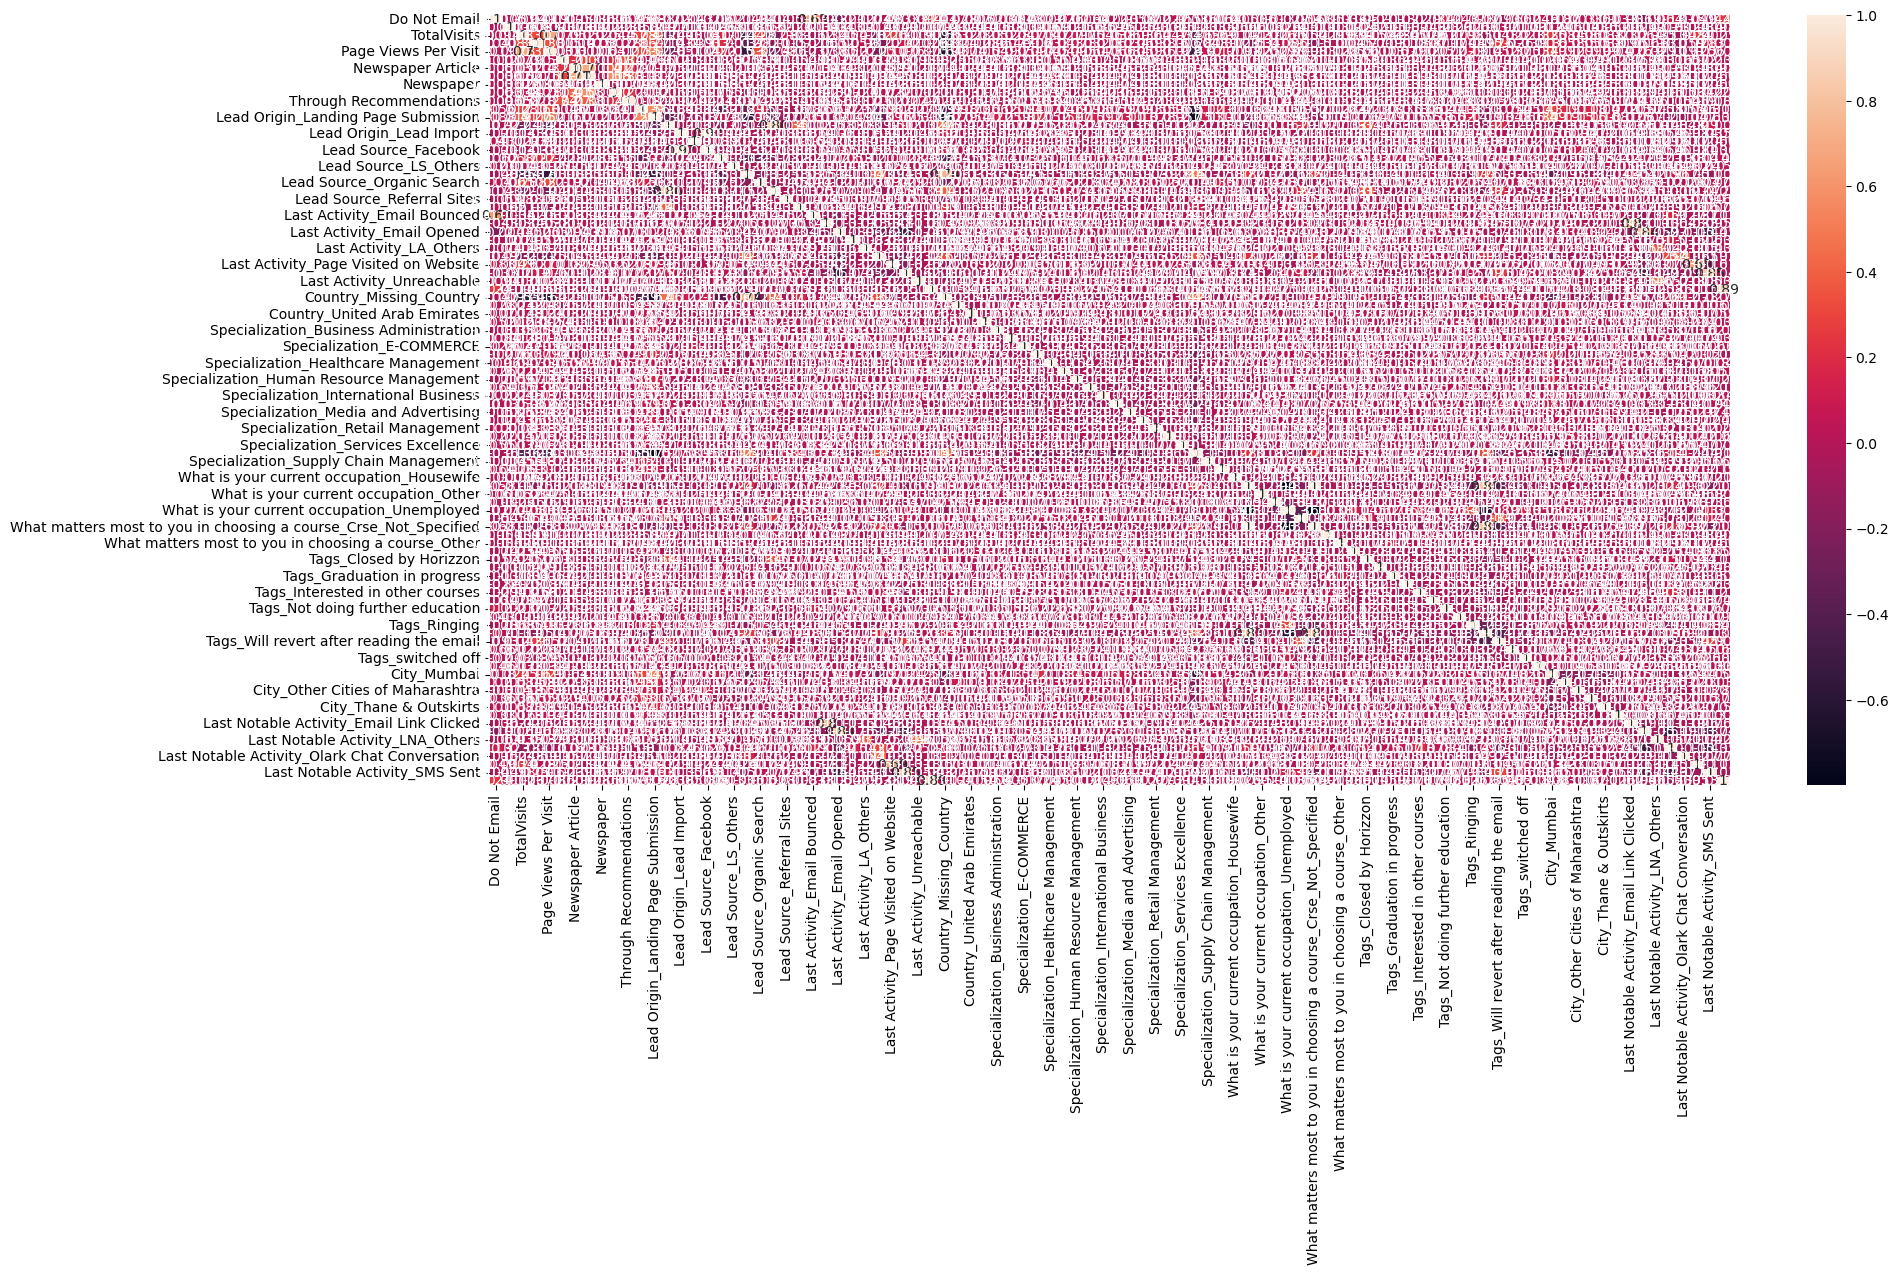

In [94]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

### Step 7: Model Building Using RFE


#### Running First Training Model

In [95]:
logreg = LogisticRegression()

rfe = RFE(logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [96]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True,  True, False, False, False, False,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False,  True,
        True, False, False, False])

In [97]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 6),
 ('Do Not Call', False, 62),
 ('TotalVisits', False, 49),
 ('Total Time Spent on Website', False, 3),
 ('Page Views Per Visit', False, 57),
 ('Search', False, 22),
 ('Newspaper Article', False, 77),
 ('X Education Forums', False, 61),
 ('Newspaper', False, 63),
 ('Digital Advertisement', False, 46),
 ('Through Recommendations', False, 72),
 ('A free copy of Mastering The Interview', False, 44),
 ('Lead Origin_Landing Page Submission', False, 29),
 ('Lead Origin_Lead Add Form', False, 12),
 ('Lead Origin_Lead Import', False, 30),
 ('Lead Origin_Quick Add Form', False, 65),
 ('Lead Source_Facebook', False, 4),
 ('Lead Source_Google', False, 67),
 ('Lead Source_LS_Others', False, 47),
 ('Lead Source_Olark Chat', False, 79),
 ('Lead Source_Organic Search', False, 75),
 ('Lead Source_Reference', False, 53),
 ('Lead Source_Referral Sites', False, 66),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 36),
 ('Last Activity_Email L

In [98]:
col = X_train.columns[rfe.support_]

In [100]:
X_train.columns[~rfe.support_]  # show col not supported  by rfe

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_LS_Others',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_LA_Others', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed', 'Country_Missing_Co

##### Assessing the model with StatsModels

In [102]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1279.9
Date:                Tue, 27 Dec 2022   Deviance:                       2559.8
Time:                        08:53:53   Pearson chi2:                 1.60e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.6069
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                               -2.9259      0.181    -16.141      0.000      -3.281      -2.571
Lead Source_Welingak Website                                         2.7216      0.753      3.613      0.000       1.245       4.198
Last Activity_SMS Sent                                               2.2484      0.121     18.545      0.000       2.011       2.486
What matters most to you in choosing a course_Crse_Not_Specified    -2.6311      0.148    -17.786      0.000      -2.921      -2.341
Tags_Busy                                                            1.9295      0.277      6.974      0.000       1.387       2.472
Tags_Closed by Horizzon                                              9.4289      1.021      9.235      0.000       7.428      11.430
Tags_Lost to EINS                                                    9.4761      0.766     12.368      0.000       7.974      10.978
Tags_Not doing further education                                    -1.3575      1.033     -1.314      0.189      -3.383       0.668
Tags_Ringing                                                        -1.8406      0.280     -6.582      0.000      -2.389      -1.292
Tags_Tags_Not_Specified                                              3.4473      0.212     16.270      0.000       3.032       3.863
Tags_Will revert after reading the email                             6.2606      0.237     26.454      0.000       5.797       6.724
Tags_invalid number                                                 -2.3810      1.037     -2.295      0.022      -4.414      -0.348
Tags_switched off                                                   -2.3117      0.546     -4.237      0.000      -3.381      -1.242
Tags_wrong number given                                            -21.6894    1.3e+04     -0.002      0.999   -2.55e+04    2.54e+04
Last Notable Activity_Modified                                      -1.5260      0.121    -12.579      0.000      -1.764      -1.288
Last Notable Activity_Olark Chat Conversation                       -1.1745      0.418     -2.810      0.005      -1.994      -0.355
====================================================================================================================================
"""

In [105]:
# VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                        Lead Source_Welingak Website  1.12
4                             Tags_Closed by Horizzon  1.07
5                                   Tags_Lost to EINS  1.06
3                                           Tags_Busy  1.04
11                                  Tags_switched off  1.04
14      Last Notable Activity_Olark Chat Conversation  1.04
6                    Tags_Not doing further education  1.03
10                                Tags_invalid number  1.01
12                            Tags_wrong number given  1.01
2   What matters most to you in choosing a course_...  0.29
9            Tags_Will revert after reading the email  0.15
1                              Last Activity_SMS Sent  0.13
7                                        Tags_Ringing  0.10
8                             Tags_Tags_Not_Specified  0.09
13                     Last Notable Activity_Modified  0.05

In [106]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.008438
6795    0.627458
3516    0.008438
8105    0.074597
3934    0.268032
4844    0.996253
3297    0.008438
8071    0.993152
987     0.025688
7423    0.996253
dtype: float64

In [107]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00843833, 0.62745759, 0.00843833, 0.07459728, 0.26803161,
       0.99625313, 0.00843833, 0.99315244, 0.02568761, 0.99625313])

In [108]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final.head()

Converted  Converted_Prob    ID
0          0        0.008438  1871
1          0        0.627458  6795
2          0        0.008438  3516
3          0        0.074597  8105
4          0        0.268032  3934

In [109]:
#Creating new column 'predicted' with 1 if Coverted_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Converted  Converted_Prob    ID  predicted
0          0        0.008438  1871          0
1          0        0.627458  6795          1
2          0        0.008438  3516          0
3          0        0.074597  8105          0
4          0        0.268032  3934          0

In [110]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3783  219]
 [ 233 2233]]


In [105]:
# overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.930117501546073


In [112]:
#drop column with high p-value - Tags_wrong number given

col = col.drop('Tags_wrong number given',1)

BUILDING MODEL #2

In [113]:


X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1284.4
Date:                Tue, 27 Dec 2022   Deviance:                       2568.9
Time:                        10:20:13   Pearson chi2:                 1.57e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6063
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                               -3.0376      0.182    -16.674      0.000      -3.395      -2.681
Lead Source_Welingak Website                                         2.7181      0.753      3.611      0.000       1.243       4.194
Last Activity_SMS Sent                                               2.2200      0.120     18.455      0.000       1.984       2.456
What matters most to you in choosing a course_Crse_Not_Specified    -2.6222      0.147    -17.794      0.000      -2.911      -2.333
Tags_Busy                                                            2.0565      0.275      7.469      0.000       1.517       2.596
Tags_Closed by Horizzon                                              9.5302      1.021      9.331      0.000       7.528      11.532
Tags_Lost to EINS                                                    9.5708      0.767     12.486      0.000       8.068      11.073
Tags_Not doing further education                                    -1.2409      1.033     -1.201      0.230      -3.265       0.784
Tags_Ringing                                                        -1.7053      0.278     -6.136      0.000      -2.250      -1.161
Tags_Tags_Not_Specified                                              3.5597      0.212     16.761      0.000       3.143       3.976
Tags_Will revert after reading the email                             6.3685      0.238     26.810      0.000       5.903       6.834
Tags_invalid number                                                 -2.2454      1.037     -2.166      0.030      -4.277      -0.213
Tags_switched off                                                   -2.1749      0.545     -3.994      0.000      -3.242      -1.108
Last Notable Activity_Modified                                      -1.5133      0.121    -12.490      0.000      -1.751      -1.276
Last Notable Activity_Olark Chat Conversation                       -1.1721      0.418     -2.803      0.005      -1.992      -0.353
====================================================================================================================================
"""

In [115]:
# VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                        Lead Source_Welingak Website  1.12
4                             Tags_Closed by Horizzon  1.07
5                                   Tags_Lost to EINS  1.06
3                                           Tags_Busy  1.04
11                                  Tags_switched off  1.04
13      Last Notable Activity_Olark Chat Conversation  1.04
6                    Tags_Not doing further education  1.03
10                                Tags_invalid number  1.01
2   What matters most to you in choosing a course_...  0.29
9            Tags_Will revert after reading the email  0.15
1                              Last Activity_SMS Sent  0.13
7                                        Tags_Ringing  0.10
8                             Tags_Tags_Not_Specified  0.09
12                     Last Notable Activity_Modified  0.05

In [116]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.008637
6795    0.627624
3516    0.008637
8105    0.074263
3934    0.270663
4844    0.996131
3297    0.008637
8071    0.993168
987     0.026250
7423    0.996131
dtype: float64

In [117]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00863735, 0.62762382, 0.00863735, 0.07426316, 0.27066318,
       0.99613088, 0.00863735, 0.9931678 , 0.02625024, 0.99613088])

In [118]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final.head()

Converted  Converted_Prob    ID
0          0        0.008637  1871
1          0        0.627624  6795
2          0        0.008637  3516
3          0        0.074263  8105
4          0        0.270663  3934

In [119]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Converted  Converted_Prob    ID  predicted
0          0        0.008637  1871          0
1          0        0.627624  6795          1
2          0        0.008637  3516          0
3          0        0.074263  8105          0
4          0        0.270663  3934          0

In [120]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3783  219]
 [ 233 2233]]


In [121]:
# overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.930117501546073


In [122]:
#drop column with high p-value - Tags_Not doing further education

col = col.drop('Tags_Not doing further education',1)

In [116]:
#BUILDING MODEL #3

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1285.5
Date:                Tue, 12 Jul 2022   Deviance:                       2571.0
Time:                        22:11:53   Pearson chi2:                 1.57e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6062
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                               -3.1009      0.179    -17.293      0.000      -3.452      -2.749
Lead Source_Welingak Website                                         2.7188      0.753      3.611      0.000       1.243       4.194
Last Activity_SMS Sent                                               2.2227      0.120     18.475      0.000       1.987       2.459
What matters most to you in choosing a course_Crse_Not_Specified    -2.6229      0.147    -17.793      0.000      -2.912      -2.334
Tags_Busy                                                            2.1184      0.274      7.742      0.000       1.582       2.655
Tags_Closed by Horizzon                                              9.5949      1.021      9.399      0.000       7.594      11.596
Tags_Lost to EINS                                                    9.6359      0.766     12.582      0.000       8.135      11.137
Tags_Ringing                                                        -1.6444      0.276     -5.953      0.000      -2.186      -1.103
Tags_Tags_Not_Specified                                              3.6229      0.210     17.256      0.000       3.211       4.034
Tags_Will revert after reading the email                             6.4324      0.235     27.337      0.000       5.971       6.894
Tags_invalid number                                                 -2.1845      1.036     -2.108      0.035      -4.216      -0.153
Tags_switched off                                                   -2.1141      0.544     -3.888      0.000      -3.180      -1.048
Last Notable Activity_Modified                                      -1.5152      0.121    -12.509      0.000      -1.753      -1.278
Last Notable Activity_Olark Chat Conversation                       -1.1685      0.419     -2.792      0.005      -1.989      -0.348
====================================================================================================================================
"""

In [117]:
# VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                        Lead Source_Welingak Website  1.12
4                             Tags_Closed by Horizzon  1.07
5                                   Tags_Lost to EINS  1.06
3                                           Tags_Busy  1.04
10                                  Tags_switched off  1.04
12      Last Notable Activity_Olark Chat Conversation  1.04
9                                 Tags_invalid number  1.01
2   What matters most to you in choosing a course_...  0.29
8            Tags_Will revert after reading the email  0.15
1                              Last Activity_SMS Sent  0.13
6                                        Tags_Ringing  0.10
7                             Tags_Tags_Not_Specified  0.09
11                     Last Notable Activity_Modified  0.05

In [118]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.008618
6795    0.627614
3516    0.008618
8105    0.074297
3934    0.270278
4844    0.996144
3297    0.008618
8071    0.993165
987     0.026182
7423    0.996144
dtype: float64

In [119]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.0086182 , 0.6276137 , 0.0086182 , 0.07429711, 0.27027826,
       0.99614393, 0.0086182 , 0.99316524, 0.0261818 , 0.99614393])

In [124]:
##### Creating a dataframe with the actual coverted flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final.head()

Converted  Converted_Prob    ID
0          0        0.008637  1871
1          0        0.627624  6795
2          0        0.008637  3516
3          0        0.074263  8105
4          0        0.270663  3934

In [125]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Converted  Converted_Prob    ID  predicted
0          0        0.008637  1871          0
1          0        0.627624  6795          1
2          0        0.008637  3516          0
3          0        0.074263  8105          0
4          0        0.270663  3934          0

In [126]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3783  219]
 [ 233 2233]]


In [127]:
# overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.930117501546073


In [128]:
#drop column with high p-value - Tags_Not doing further education

col = col.drop('Tags_invalid number',1)

In [129]:
#BUILDING MODEL #4

X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1289.7
Date:                Tue, 27 Dec 2022   Deviance:                       2579.4
Time:                        10:39:46   Pearson chi2:                 1.53e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6057
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                               -3.2493      0.179    -18.189      0.000      -3.599      -2.899
Lead Source_Welingak Website                                         2.7131      0.752      3.607      0.000       1.239       4.187
Last Activity_SMS Sent                                               2.1892      0.119     18.366      0.000       1.956       2.423
What matters most to you in choosing a course_Crse_Not_Specified    -2.6127      0.147    -17.808      0.000      -2.900      -2.325
Tags_Busy                                                            2.2839      0.271      8.437      0.000       1.753       2.814
Tags_Closed by Horizzon                                              9.7263      1.021      9.526      0.000       7.725      11.727
Tags_Lost to EINS                                                    9.7600      0.766     12.742      0.000       8.259      11.261
Tags_Ringing                                                        -1.4684      0.273     -5.386      0.000      -2.003      -0.934
Tags_Tags_Not_Specified                                              3.7707      0.209     18.028      0.000       3.361       4.181
Tags_Will revert after reading the email                             6.5735      0.235     27.934      0.000       6.112       7.035
Tags_switched off                                                   -1.9362      0.542     -3.574      0.000      -2.998      -0.874
Last Notable Activity_Modified                                      -1.4945      0.121    -12.353      0.000      -1.732      -1.257
Last Notable Activity_Olark Chat Conversation                       -1.1645      0.419     -2.782      0.005      -1.985      -0.344
====================================================================================================================================
"""

In [130]:
# VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                        Lead Source_Welingak Website  1.12
4                             Tags_Closed by Horizzon  1.07
5                                   Tags_Lost to EINS  1.06
3                                           Tags_Busy  1.04
9                                   Tags_switched off  1.04
11      Last Notable Activity_Olark Chat Conversation  1.04
2   What matters most to you in choosing a course_...  0.29
8            Tags_Will revert after reading the email  0.15
1                              Last Activity_SMS Sent  0.13
6                                        Tags_Ringing  0.10
7                             Tags_Tags_Not_Specified  0.09
10                     Last Notable Activity_Modified  0.05

In [131]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.008856
6795    0.627463
3516    0.008856
8105    0.073881
3934    0.274257
4844    0.995984
3297    0.008856
8071    0.993189
987     0.026965
7423    0.995984
dtype: float64

In [132]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00885606, 0.62746301, 0.00885606, 0.07388105, 0.27425653,
       0.99598378, 0.00885606, 0.99318938, 0.02696539, 0.99598378])

In [129]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final.head()

Converted  Converted_Prob    ID
0          0        0.008856  1871
1          0        0.627463  6795
2          0        0.008856  3516
3          0        0.073881  8105
4          0        0.274257  3934

In [130]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Converted  Converted_Prob    ID  predicted
0          0        0.008856  1871          0
1          0        0.627463  6795          1
2          0        0.008856  3516          0
3          0        0.073881  8105          0
4          0        0.274257  3934          0

In [131]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3783  219]
 [ 233 2233]]


In [132]:
# overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.930117501546073


In [133]:
#drop column with high p-value - Last Notable Activity_Olark Chat Conversation

col = col.drop('Last Notable Activity_Olark Chat Conversation',1)

In [134]:
#BUILDING MODEL #5

X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1294.4
Date:                Tue, 12 Jul 2022   Deviance:                       2588.7
Time:                        22:11:53   Pearson chi2:                 1.54e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6051
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                               -3.2917      0.178    -18.449      0.000      -3.641      -2.942
Lead Source_Welingak Website                                         2.7459      0.752      3.653      0.000       1.273       4.219
Last Activity_SMS Sent                                               2.2303      0.119     18.783      0.000       1.998       2.463
What matters most to you in choosing a course_Crse_Not_Specified    -2.6132      0.146    -17.894      0.000      -2.899      -2.327
Tags_Busy                                                            2.2952      0.271      8.462      0.000       1.764       2.827
Tags_Closed by Horizzon                                              9.7274      1.021      9.527      0.000       7.726      11.729
Tags_Lost to EINS                                                    9.7491      0.766     12.726      0.000       8.248      11.251
Tags_Ringing                                                        -1.4628      0.273     -5.363      0.000      -1.997      -0.928
Tags_Tags_Not_Specified                                              3.7538      0.209     17.989      0.000       3.345       4.163
Tags_Will revert after reading the email                             6.5844      0.235     27.984      0.000       6.123       7.046
Tags_switched off                                                   -1.9326      0.542     -3.567      0.000      -2.995      -0.871
Last Notable Activity_Modified                                      -1.4591      0.121    -12.101      0.000      -1.695      -1.223
====================================================================================================================================
"""

In [135]:
# VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                        Lead Source_Welingak Website  1.12
4                             Tags_Closed by Horizzon  1.07
5                                   Tags_Lost to EINS  1.06
3                                           Tags_Busy  1.04
9                                   Tags_switched off  1.04
2   What matters most to you in choosing a course_...  0.29
8            Tags_Will revert after reading the email  0.14
1                              Last Activity_SMS Sent  0.13
6                                        Tags_Ringing  0.10
7                             Tags_Tags_Not_Specified  0.09
10                     Last Notable Activity_Modified  0.04

`Tags_lost to EINS`, `Tags_Closed by Horizzon`, and `Tags_will revert after reading the email`  feature varaibles show the highest coefficient

In [136]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.008539
6795    0.613517
3516    0.008539
8105    0.074176
3934    0.269535
4844    0.996022
3297    0.008539
8071    0.993150
987     0.026335
7423    0.996022
dtype: float64

In [137]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.0085388 , 0.61351662, 0.0085388 , 0.07417569, 0.26953528,
       0.99602222, 0.0085388 , 0.9931496 , 0.02633459, 0.99602222])

In [138]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final.head()

Converted  Converted_Prob    ID
0          0        0.008539  1871
1          0        0.613517  6795
2          0        0.008539  3516
3          0        0.074176  8105
4          0        0.269535  3934

In [139]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Converted  Converted_Prob    ID  predicted
0          0        0.008539  1871          0
1          0        0.613517  6795          1
2          0        0.008539  3516          0
3          0        0.074176  8105          0
4          0        0.269535  3934          0

In [140]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3778  224]
 [ 227 2239]]


In [141]:
# overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9302721088435374


## Metrics beyond simply accuracy

In [142]:
TP = confusion[1,1] # true positive  : actual converted being predicted as converted
TN = confusion[0,0] # true negatives : actual non-converted being predicted as non-coverted
FP = confusion[0,1] # false positives : actual non-converted being predicted as converted
FN = confusion[1,0] # false negatives : actual non-coverted being predicted as non-converted

In [143]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.907948094079481

In [144]:
# Let us calculate specificity
TN / float(TN+FP)

0.9440279860069966

In [145]:
# Calculate false postive rate - predicting converted  when there is actual non coverted
print(FP/ float(TN+FP))

0.0559720139930035


In [146]:
# positive predictive value 
print (TP / float(TP+FP))

0.9090539991879821


In [147]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9433208489388265


### Step 8: Plotting the ROC Curve

An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [133]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [134]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

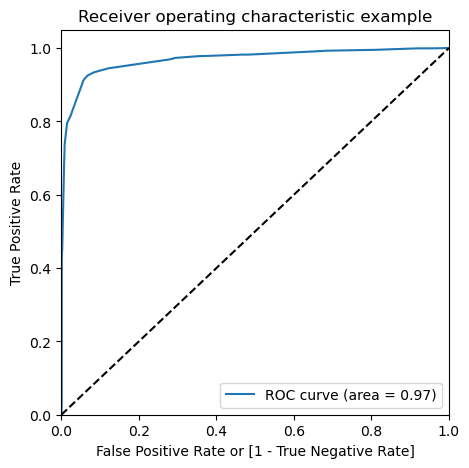

In [135]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Step 9: Finding Optimal Cutoff Point

In [151]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob    ID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0          0        0.008539  1871          0    1    0    0    0    0    0   
1          0        0.613517  6795          1    1    1    1    1    1    1   
2          0        0.008539  3516          0    1    0    0    0    0    0   
3          0        0.074176  8105          0    1    0    0    0    0    0   
4          0        0.269535  3934          0    1    1    1    0    0    0   

   0.6  0.7  0.8  0.9  
0    0    0    0    0  
1    1    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0

In [152]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.802721  0.969181  0.700150
0.2   0.2  0.900897  0.945255  0.873563
0.3   0.3  0.931200  0.911598  0.943278
0.4   0.4  0.931200  0.911598  0.943278
0.5   0.5  0.930272  0.907948  0.944028
0.6   0.6  0.921923  0.858070  0.961269
0.7   0.7  0.914193  0.810624  0.978011
0.8   0.8  0.912801  0.794404  0.985757
0.9   0.9  0.894094  0.735604  0.991754


As you can see, when the probability thresholds are very low, the sensitivity is very high and specificity is very low. Similarly, for larger probability thresholds, the sensitivity values are very low but the specificity values are very high. And at about between 0.2 and 0.3, the three metrics might seem to be almost equal with decent values and hence,  so we choose 0.25 as the optimal cut-off point. The optimal cut-off point exists where the values of accuracy, sensitivity, and specificity are fairly decent and almost equal.

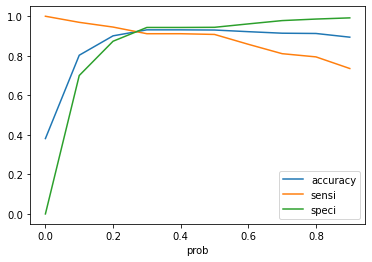

In [153]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.25 x is the optimum point to take it as a cutoff probability.
####  at about a threshold of 0.25, the curves of accuracy, sensitivity and specificity intersect, and they all take a value of around 91 to 93%.

In [138]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.25 else 0)

y_train_pred_final.head()

Converted  Converted_Prob    ID  predicted  final_predicted
0          0        0.008637  1871          0                0
1          0        0.627624  6795          1                1
2          0        0.008637  3516          0                0
3          0        0.074263  8105          0                0
4          0        0.270663  3934          0                1

In [139]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9226963512677798

In [140]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3665,  337],
       [ 163, 2303]], dtype=int64)

In [141]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [142]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9339010543390105

In [143]:
# Let us calculate specificity
TN / float(TN+FP)

0.915792103948026

In [144]:
# Calculate false postive rate - predicting converted when actual its not

print(FP/ float(TN+FP))

0.08420789605197401


In [145]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8723484848484848


In [146]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9574190177638453


## Precision and Recall

In [147]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3783,  219],
       [ 233, 2233]], dtype=int64)

#### Precision
TP / TP + FP

In [148]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9106851549755302

#### Recall
TP / TP + FN

In [149]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.9055150040551501

### Precision and recall tradeoff

In [150]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       1
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: predicted, Length: 6468, dtype: int64)

In [151]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

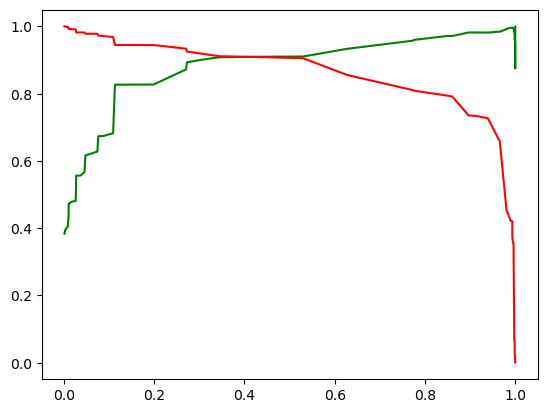

In [152]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

    # 0.42 is the cutoff from precision_recall_curve

### Step 10: Making predictions on the test set

In [157]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [158]:
X_test = X_test[col]
X_test.head()

Lead Source_Welingak Website  Last Activity_SMS Sent  \
4269                             0                       1   
2376                             0                       1   
7766                             0                       0   
9199                             0                       0   
4359                             0                       0   

      What matters most to you in choosing a course_Crse_Not_Specified  \
4269                                                  1                  
2376                                                  0                  
7766                                                  0                  
9199                                                  0                  
4359                                                  0                  

      Tags_Busy  Tags_Closed by Horizzon  Tags_Lost to EINS  Tags_Ringing  \
4269          0                        0                  0             0   
2376          0                        0                  0             0   
7766          0                        0                  0             0   
9199          0                        0                  0             0   
4359          0                        0                  0             0   

      Tags_Tags_Not_Specified  Tags_Will revert after reading the email  \
4269                        1                                         0   
2376                        0                                         1   
7766                        0                                         1   
9199                        0                                         0   
4359                        0                                         1   

      Tags_switched off  Last Notable Activity_Modified  \
4269                  0                               0   
2376                  0                               0   
7766                  0                               0   
9199                  0                               1   
4359                  0                               0   

      Last Notable Activity_Olark Chat Conversation  
4269                                              0  
2376                                              0  
7766                                              0  
9199                                              0  
4359                                              0

In [159]:
X_test_sm = sm.add_constant(X_test)

In [160]:
#Making predictions on the test set
y_test_pred = res.predict(X_test_sm)

In [161]:
y_test_pred.head()

4269    0.524437
2376    0.995984
7766    0.965249
9199    0.008630
4359    0.965249
dtype: float64

In [162]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [163]:
y_pred_1.head()

0
4269  0.524437
2376  0.995984
7766  0.965249
9199  0.008630
4359  0.965249

In [164]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [165]:
# Putting ID to index
y_test_df['ID'] = y_test_df.index

In [166]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [167]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [168]:
y_pred_final.head()

Converted    ID         0
0          1  4269  0.524437
1          1  2376  0.995984
2          1  7766  0.965249
3          0  9199  0.008630
4          1  4359  0.965249

In [169]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})
y_pred_final

Converted    ID  Converted_Prob
0             1  4269        0.524437
1             1  2376        0.995984
2             1  7766        0.965249
3             0  9199        0.008630
4             1  4359        0.965249
...         ...   ...             ...
2767          0  8649        0.109937
2768          1  2152        0.937647
2769          0  7101        0.037351
2770          0  5331        0.026965
2771          1  2960        0.995984

[2772 rows x 3 columns]

In [170]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['ID','Converted','Converted_Prob'], axis=1)

In [171]:
y_pred_final.head()

ID  Converted  Converted_Prob
0  4269          1        0.524437
1  2376          1        0.995984
2  7766          1        0.965249
3  9199          0        0.008630
4  4359          1        0.965249

In [172]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_pred_final['Lead Score'] = y_pred_final['Converted_Prob']*100
y_pred_final.sort_values(by='Lead Score',ascending=False,inplace=True)

In [173]:
y_pred_final.head()

ID  Converted  Converted_Prob  final_predicted  Lead Score
157   4830          1        0.999951                1   99.995075
920   3339          1        0.999949                1   99.994906
1329  4812          1        0.999949                1   99.994906
2162  3736          1        0.999949                1   99.994906
915   8412          1        0.999949                1   99.994906

In [174]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9343434343434344

In [175]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1569,  108],
       [  74, 1021]], dtype=int64)

In [176]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [177]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9324200913242009

In [178]:
# Let us calculate specificity
TN / float(TN+FP)

0.9355992844364938